In [1]:
%load_ext autoreload
%autoreload 2
import torch
import os
import sys
sys.path.append("..")
from geodesic_opt import plot_lmc_geodesic_comparison_obj
from experiments import opt_plot

In [2]:
exppath = "../experiments/"
fpath = "mlp_mnist_permuted_50_epochs/mlp_mnist_permuted_50_epochs"
fpath2 = "mlp_mnist_unpermuted_50_epochs/mlp_mnist_unpermuted_50_epochs"
fpathend = "_comparison_dict.pt"
comp = torch.load(exppath + fpath + fpathend)
comp2 = torch.load(exppath + fpath2 + fpathend)

lb_graphs = [
    ("Permuted MLP", "mlp_mnist_permuted_50_epochs/mlp_mnist_permuted_50_epochs"),
    ("Unpermuted MLP", "mlp_mnist_unpermuted_50_epochs/mlp_mnist_unpermuted_50_epochs"),
    ("Permuted ResNet", "resnet2_cifar_permuted_2_epochs")
]

gdopt_graphs = [
    ("MLP LMC", "mlp_mnist_permuted_50_epochs/mlp_mnist_permuted_50_epochs"),
    ("MLP naive interpolation", "mlp_mnist_unpermuted_50_epochs/mlp_mnist_unpermuted_50_epochs")
]

JSD
JSD
JSD


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/tdl/mode_connectivity/notebooks/../geodesic_opt.py:251: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/tdl/mode_connectivity/notebooks/../geodesic_opt.py:251: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/tdl/mode_connectivity/notebooks/../geodesic_opt.py:251: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(<Figure size 600x400 with 1 Axes>,
  <AxesSubplot:xlabel='Relative distance along path by JSD', ylabel='Accuracy'>),
 (<Figure size 600x400 with 1 Axes>,
  <AxesSubplot:xlabel='Relative distance along path by JSD', ylabel='Accuracy'>),
 (<Figure size 600x400 with 1 Axes>,
  <AxesSubplot:xlabel='Relative distance along path by JSD', ylabel='Accuracy'>)]

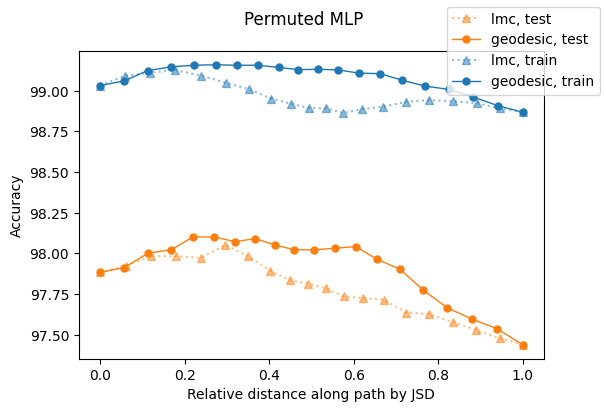

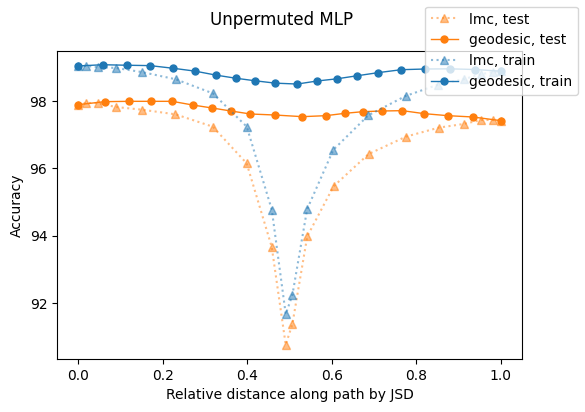

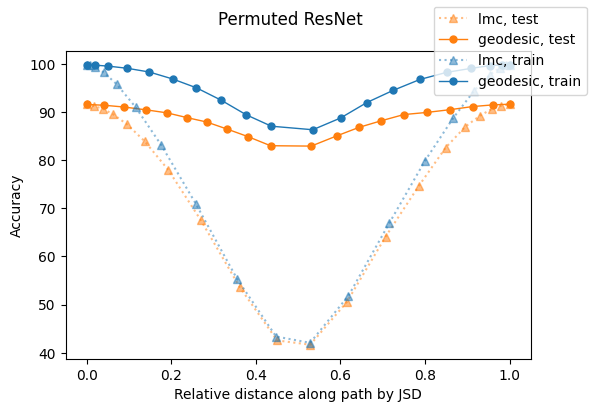

In [3]:
def save_loss_barrier_plot(name_and_fpath):
    name, fpath = name_and_fpath
    comparison = torch.load(exppath + fpath + fpathend)
    fig, ax = plot_lmc_geodesic_comparison_obj(
        comparison,
        relative_x=True,
        only_metrics=["JSD"],
        figsize=(6,4)
    )
    fig.suptitle(name)
    fig.savefig("../graphs/" + "_".join(name.split(" ")))
    return fig, ax

list(map(save_loss_barrier_plot, lb_graphs))

In [16]:
t = torch.tensor([1, 2, 3, 4, 5, 6])
torch.reshape(t, (2, -1))

tensor([[1, 2, 3],
        [4, 5, 6]])

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/tdl/mode_connectivity/notebooks/../experiments.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/tdl/mode_connectivity/notebooks/../experiments.py:67: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(<Figure size 640x480 with 2 Axes>,
  <AxesSubplot:xlabel='Epoch', ylabel='path action via JSD loss'>),
 (<Figure size 640x480 with 2 Axes>,
  <AxesSubplot:xlabel='Epoch', ylabel='path action via JSD loss'>)]

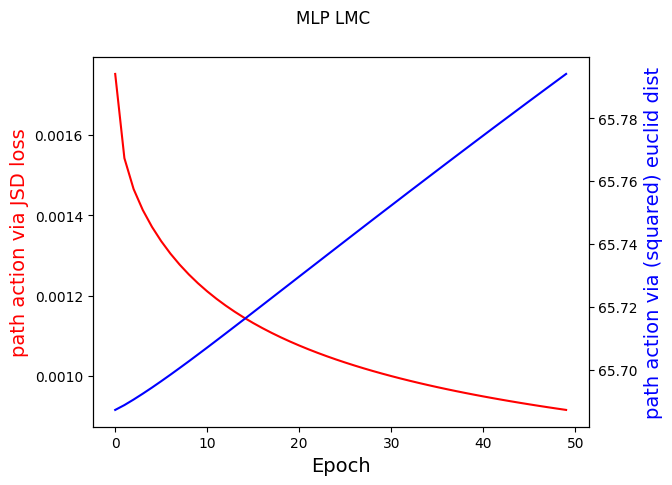

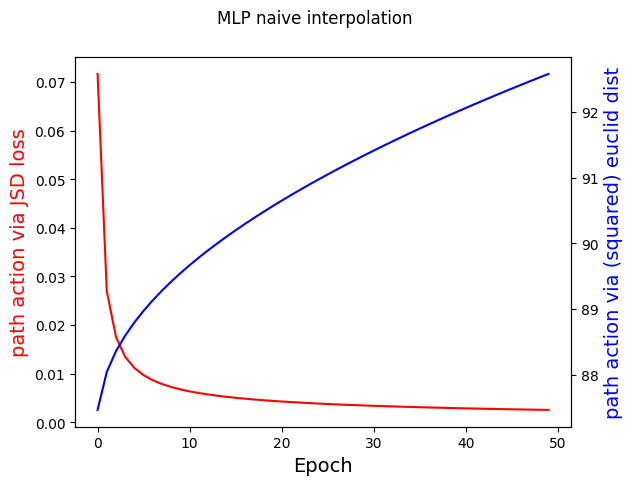

In [19]:
def save_gdopt_plot(name_and_fpath, epochs=50):
    name, fpath = name_and_fpath
    JSD_lengths = torch.reshape(torch.tensor(torch.load(exppath + fpath + "_path_action.pt")), (epochs, -1)).mean(axis=1)
    euc_lengths = torch.reshape(torch.tensor(torch.load(exppath + fpath + "_sq_euc_dists.pt")), (epochs, -1)).mean(axis=1)
    fig, ax = opt_plot(
        JSD_lengths,
        euc_lengths,
        rolling_mean_length=1
    )
    ax.set_xlabel("Epoch")
    fig.suptitle(name)
    fig.savefig("../graphs/" + "_".join(name.split(" ")))
    return fig, ax

list(map(save_gdopt_plot, gdopt_graphs))

In [8]:
# torch.load(exppath + gdopt_graphs[0][1] + "_sq_euc_dists.pt")
torch.load(exppath + gdopt_graphs[0][1] + "_path_action.pt")

[0.002034661127254367,
 0.002732992172241211,
 0.0007748137577436864,
 0.0018081626622006297,
 0.0020889206789433956,
 0.001627433462999761,
 0.001338265952654183,
 0.002456152345985174,
 0.0032818105537444353,
 0.002661164617165923,
 0.0036845740396529436,
 0.0017271337565034628,
 0.0012777680531144142,
 0.0014980229316279292,
 0.0012526046484708786,
 0.001511021051555872,
 0.0010950698051601648,
 0.001499385922215879,
 0.0015668128617107868,
 0.0008440171950496733,
 0.0013593429466709495,
 0.0022384461481124163,
 0.0019387060310691595,
 0.0025463153142482042,
 0.0008052525226958096,
 0.0019531057914718986,
 0.0015748149016872048,
 0.002060313243418932,
 0.0010804424528032541,
 0.0026959856040775776,
 0.0010264348238706589,
 0.0017577663529664278,
 0.0014311409322544932,
 0.0018088608048856258,
 0.0016563395038247108,
 0.0011980186682194471,
 0.002149637322872877,
 0.0016592472093179822,
 0.002550549106672406,
 0.0036447448655962944,
 0.0019249164033681154,
 0.0017283556517213583,
 0.